# Análisis Exploratorio de Datos

In [1]:
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
machine_failure = pd.read_csv('data/ai4i2020.csv')

Para crear el reporte de análisis exploratorio de datos, solo ejecuta el comando `python scripts/profile_report.py` desde la raíz de este proyecto.

El resultado mismo se encuentra en el archivo `machine_failure_profiling_report.html` en la raíz de este proyecto.

# EDA con pandas

In [3]:
machine_failure.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
machine_failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

## Verificamos que la primera letra de la columna `Product ID` es igual al valor de la columna `Type`

In [5]:
machine_failure['Type2'] = machine_failure['Product ID'].str[0]

In [6]:
machine_failure['Type'].equals(machine_failure['Type2'])

True

In [7]:
machine_failure.drop(columns=['Type2'], inplace=True)

Sí es igual, por lo que la columna `Product ID` no es necesaria.

# Histogramas para variables numéricas

In [8]:
def make_variable_histogram(data: pd.DataFrame, variable: str, bins: int):
    sns.histplot(data[variable], kde=False, bins=bins).set(title=variable, ylabel='Frecuencia')
    plt.show()

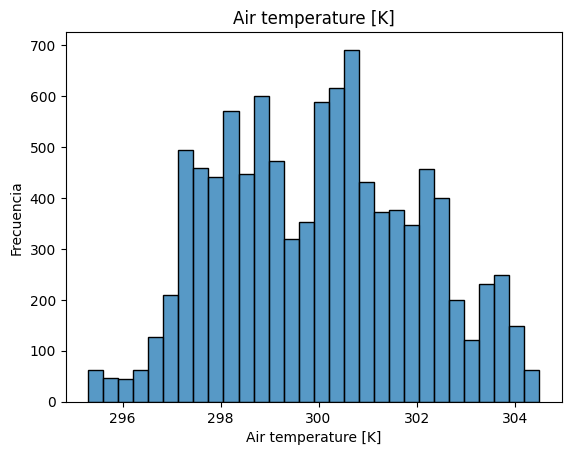

In [9]:
make_variable_histogram(machine_failure, 'Air temperature [K]', 30)

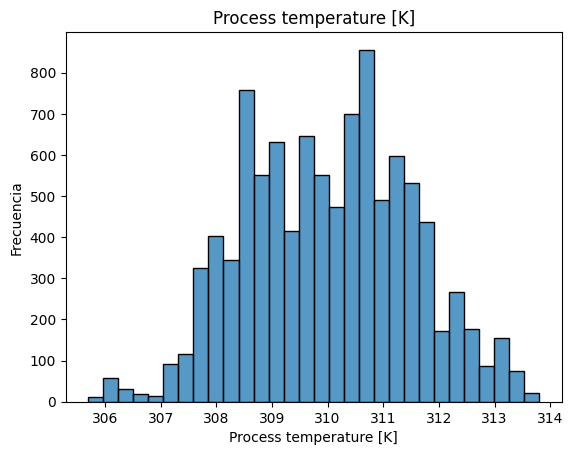

In [10]:
make_variable_histogram(machine_failure, 'Process temperature [K]', 30)

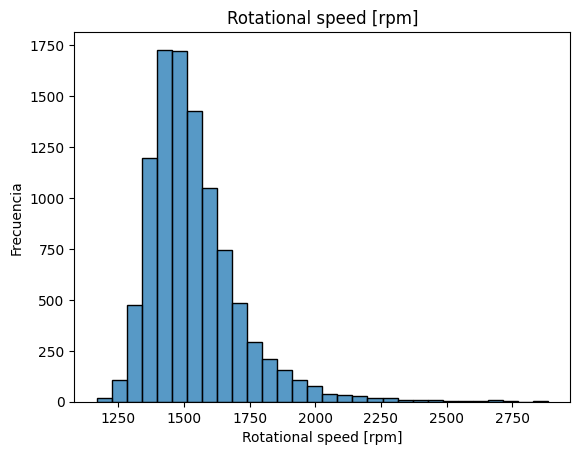

In [11]:
make_variable_histogram(machine_failure, 'Rotational speed [rpm]', 30)

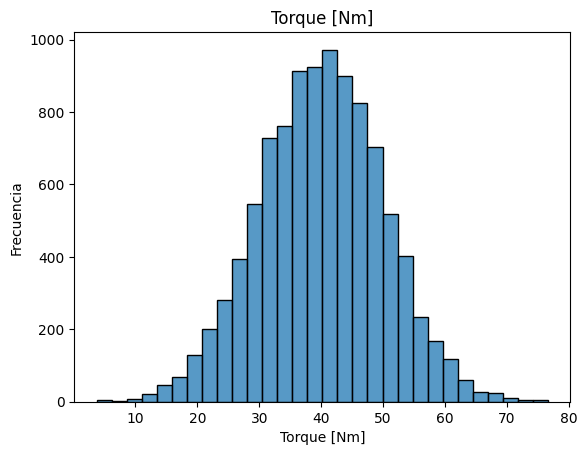

In [12]:
make_variable_histogram(machine_failure, 'Torque [Nm]', 30)

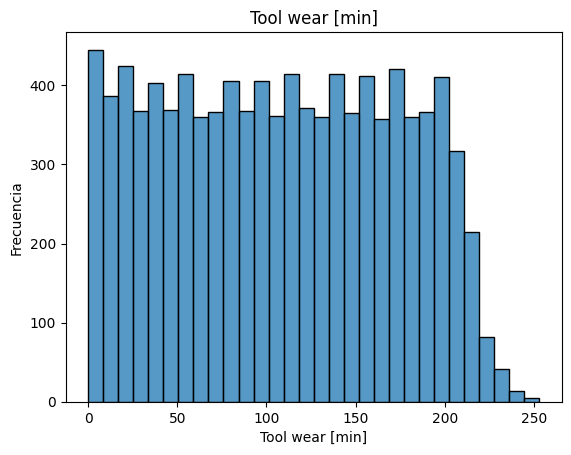

In [13]:
make_variable_histogram(machine_failure, 'Tool wear [min]', 30)

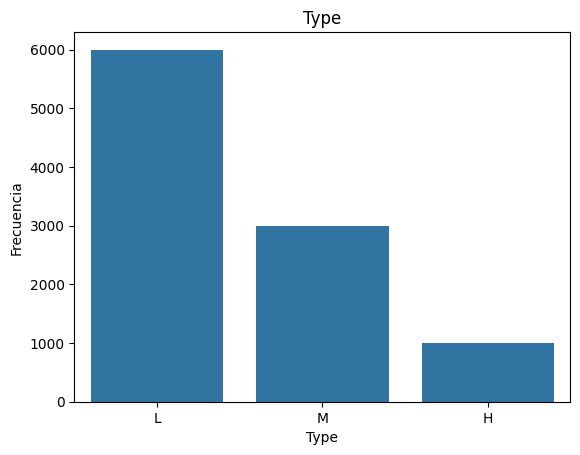

In [14]:

sns.countplot(data=machine_failure, x='Type', order=['L', 'M', 'H']).\
    set(title='Type', ylabel='Frecuencia')
plt.show()

In [15]:
machine_failure['Machine failure'].value_counts()

Machine failure
0    9661
1     339
Name: count, dtype: int64

In [16]:
machine_failure['Machine failure'].value_counts(normalize=True) * 100

Machine failure
0    96.61
1     3.39
Name: proportion, dtype: float64

## Box plots

In [17]:
def make_variable_boxplot(data: pd.DataFrame, variable: str):
    plt.figure(figsize=(5.5, 6))
    sns.boxplot(data=data, y=variable).set(title=variable)
    plt.show()

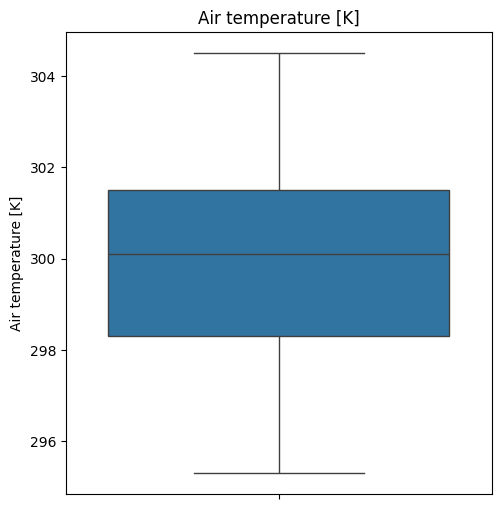

In [18]:
make_variable_boxplot(machine_failure, 'Air temperature [K]')

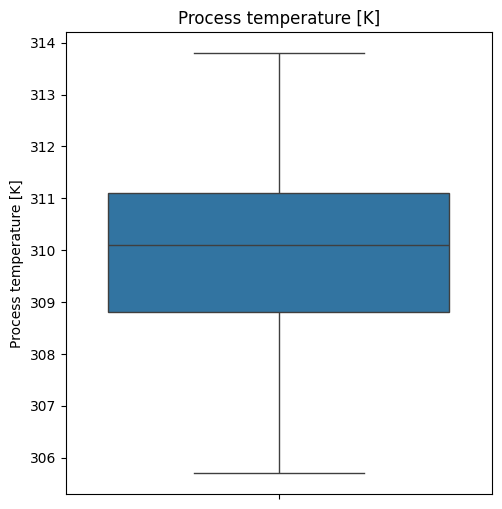

In [19]:
make_variable_boxplot(machine_failure, 'Process temperature [K]')

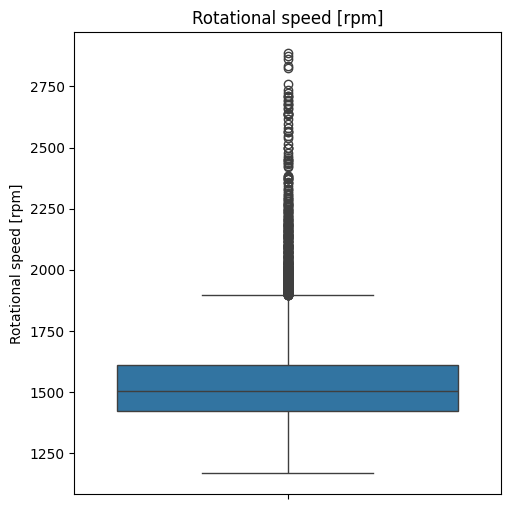

In [20]:
make_variable_boxplot(machine_failure, 'Rotational speed [rpm]')

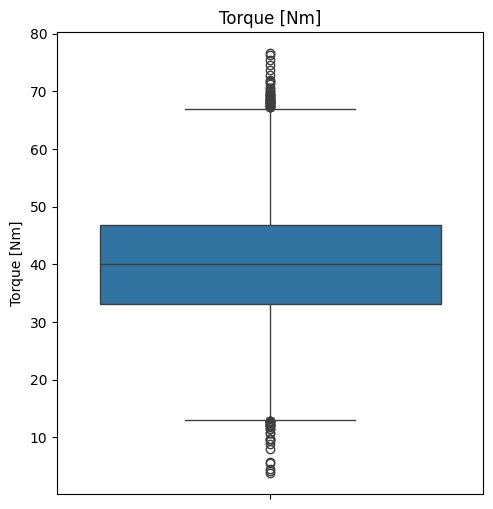

In [21]:
make_variable_boxplot(machine_failure, 'Torque [Nm]')

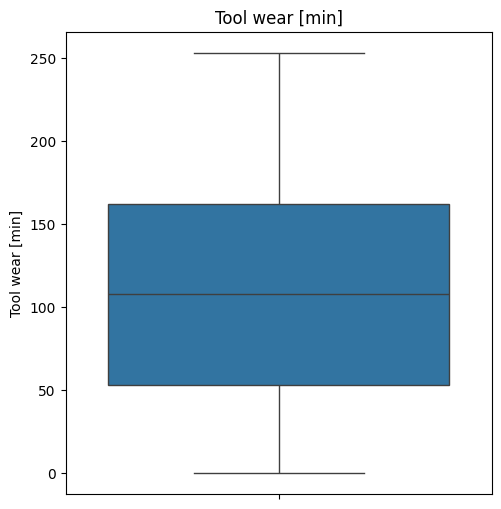

In [22]:
make_variable_boxplot(machine_failure, 'Tool wear [min]')

## Correlation plot

In [23]:
correlation_columns = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]',
    'Machine failure'
]

# Calculate the correlation matrix
corr_matrix = machine_failure[correlation_columns].corr()

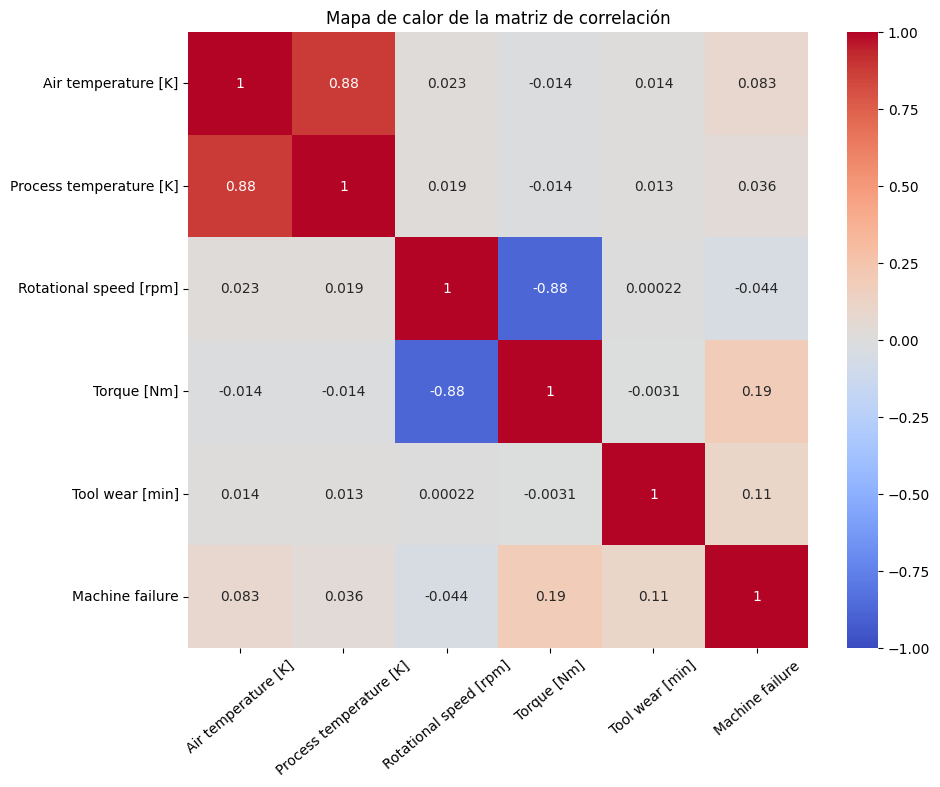

In [24]:
# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)

# Display the heatmap
plt.title('Mapa de calor de la matriz de correlación')
plt.xticks(rotation=40)
plt.show()

### Gráficos de dispersión para variables que están muy correlacionadas

Los pares relacionados son:
1. `Air temperature [K]` y `Air temperature [C]`.
2. `Rotational speed [rpm]` y `Torque [Nm]`.

<Axes: xlabel='Air temperature [K]', ylabel='Process temperature [K]'>

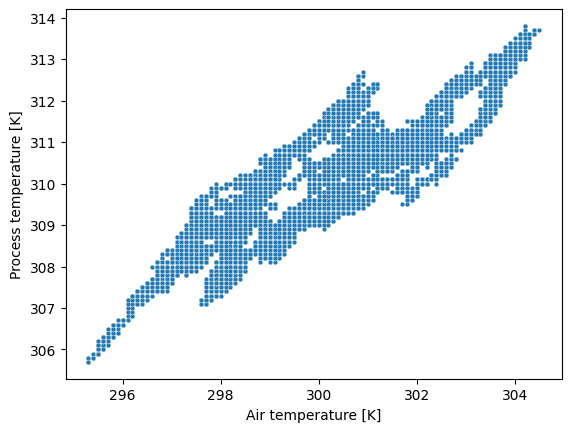

In [25]:
sns.scatterplot(
    data=machine_failure,
    x='Air temperature [K]',
    y='Process temperature [K]',
    s=12
)

<Axes: xlabel='Rotational speed [rpm]', ylabel='Torque [Nm]'>

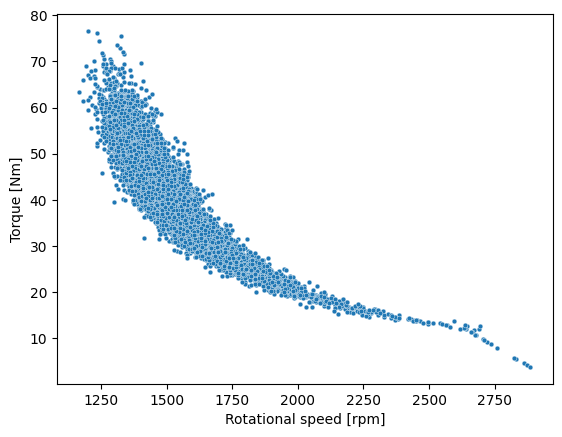

In [26]:
sns.scatterplot(
    data=machine_failure,
    x='Rotational speed [rpm]',
    y='Torque [Nm]',
    s=12
)

### Nuevas variables y correlación

In [27]:
machine_failure['Temperature difference [K]'] =\
    machine_failure['Process temperature [K]'] - machine_failure['Air temperature [K]']
machine_failure['Rotational power'] =\
    machine_failure['Rotational speed [rpm]'] * machine_failure['Torque [Nm]']

In [31]:
correlation_columns_new_features = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Temperature difference [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Rotational power',
]

# Calculate the correlation matrix
corr_matrix_new_features = machine_failure[correlation_columns_new_features].corr()

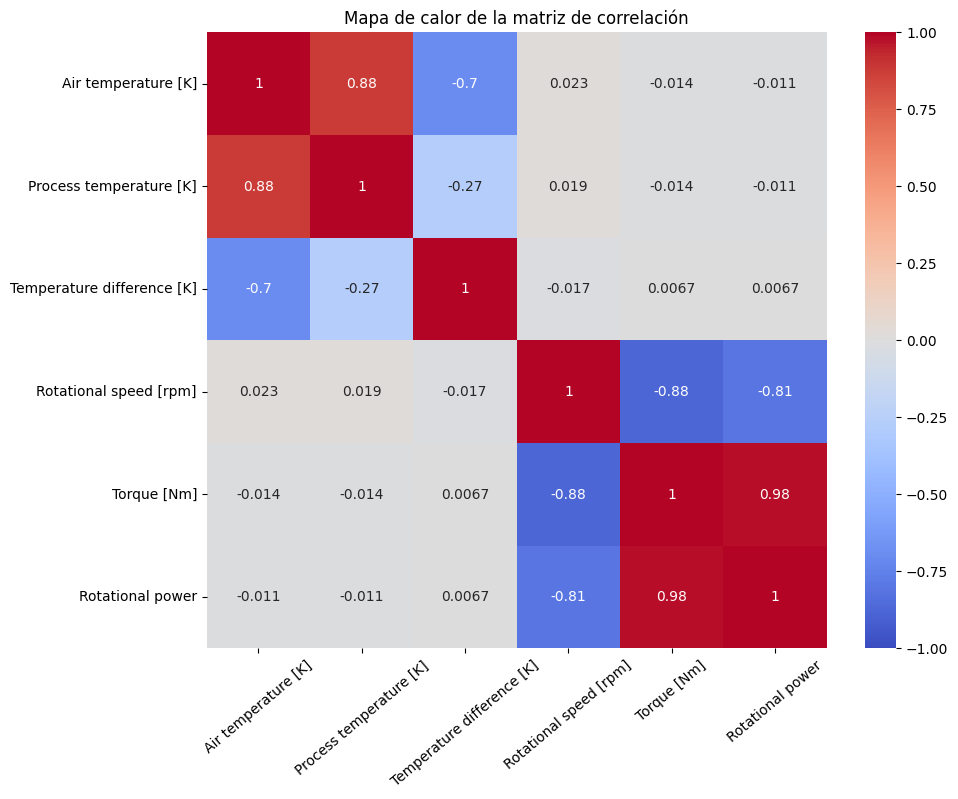

In [32]:
# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(corr_matrix_new_features, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)

# Display the heatmap
plt.title('Mapa de calor de la matriz de correlación')
plt.xticks(rotation=40)
plt.show()

### Matriz de correlación con todas las variables

In [34]:
correlation_columns_all = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Temperature difference [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Rotational power',
    'Tool wear [min]',
    'Machine failure'
]

# Calculate the correlation matrix
corr_matrix_all = machine_failure[correlation_columns_all].corr()

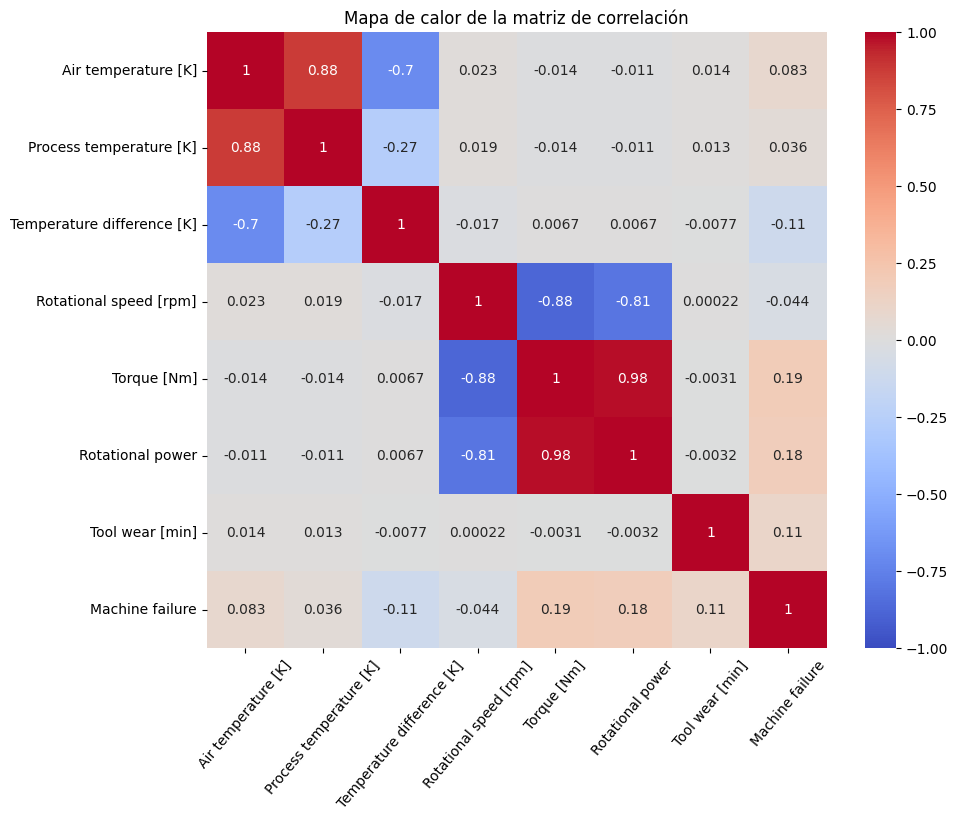

In [36]:
# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(corr_matrix_all, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)

# Display the heatmap
plt.title('Mapa de calor de la matriz de correlación')
plt.xticks(rotation=50)
plt.show()